In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import matplotlib.dates as mdates
from flask import Flask, jsonify
from pprint import pprint

import pandas as pd
from datetime import datetime as dt
import numpy as np
from scipy import stats

## Reflect Tables into SQLALchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
#inspector

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [14]:
# View all of the classes that automap found
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
year617 = calc_temps('2016-07-01','2017-06-30')
year617

[(58.0, 74.54705364995603, 87.0)]

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
low = year617[0][0]
high = year617[0][2]
avg = year617[0][1]
var = high - low
print(low,high,avg,var)

58.0 87.0 74.54705364995603 29.0


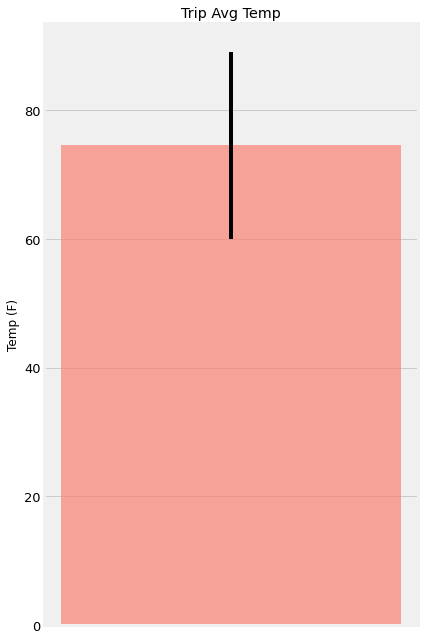

In [27]:
fig, ax = plt.subplots(figsize = (6, 9)) 
ax.bar(x = 1, height = avg, yerr = var/2, width = 0.69,color = 'salmon', alpha = 0.69) 
ax.set_xticks([0]) 
plt.yticks(size=13)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
#plt.savefig("Images/TripTemp.png", bbox_inches = 'tight')
plt.tight_layout()
plt.show()

### Daily Rainfall Average

In [33]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
beg = '2016-08-23'
end= '2017-08-23'  #beginning and end dates from our first notebook

results = session.query(Measurement.station, station.name, station.latitude,\
              station.longitude, station.elevation, func.avg(Measurement.prcp)).\
        filter(Measurement.station == station.station,Measurement.date.between(beg, end)).\
        group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(results)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.19894886363636372), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.45064024390243923), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14142857142857151), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12543396226415093), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.12105095541401273), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.044818941504178235), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0765)]


In [34]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
dates = pd.date_range(start_date, periods=7).tolist()
#dates
# Strip off the year and save a list of strings in the format %m-%d
dts = []
for date in dates:
    dts.append(dt.strftime(date,'%m-%d'))


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normals = []
for date in dts:
    normals.append(daily_normals(date))

print("For Aug 1 to Aug 7, 2017")
for normal in normals:
    print(normal)



For Aug 1 to Aug 7, 2017
[(67.0, 75.54, 83.0)]
[(68.0, 75.60377358490567, 84.0)]
[(70.0, 76.61111111111111, 85.0)]
[(69.0, 76.71153846153847, 84.0)]
[(69.0, 76.14814814814815, 82.0)]
[(67.0, 76.25, 83.0)]
[(71.0, 77.15686274509804, 83.0)]


In [42]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normal2 = []
for normal in normals:
    normal2.append(np.ravel(normal))



[array([67.  , 75.54, 83.  ]),
 array([68.        , 75.60377358, 84.        ]),
 array([70.        , 76.61111111, 85.        ]),
 array([69.        , 76.71153846, 84.        ]),
 array([69.        , 76.14814815, 82.        ]),
 array([67.  , 76.25, 83.  ]),
 array([71.        , 77.15686275, 83.        ])]

In [46]:
normdf = pd.DataFrame(normal2, columns = ['tmin','tavg','tmax'])
normdf.index = [date.strftime('%Y-%m-%d') for date in dates]
normdf

,tmin,tavg,tmax
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


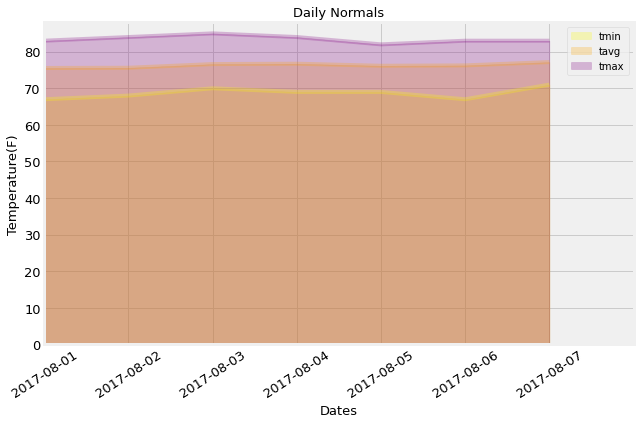

In [84]:
# Plot the daily normals as an area plot with `stacked=False`
fig, ax = plt.subplots(figsize=(9,6))
normdf.plot(kind='area', stacked=False, alpha=0.25, ax=ax, color=['yellow','orange','purple'])
plt.title("Daily Normals",fontsize=13)
plt.ylabel("Temperature(F)",fontsize=13)
plt.xlabel("Dates",fontsize=13)

plt.ylim(0,88)
plt.xlim(0,7)
plt.yticks(size=13)
plt.xticks(np.arange(7), normdf.index,fontsize=13,rotation=33)
#plt.savefig("Images/tripnormaldist.png", bbox_inches = 'tight')
plt.tight_layout()
plt.show()


## Close Session

In [85]:
session.close()